<a href="https://colab.research.google.com/github/Zblu2/data-analyst-jobs-market-analysis/blob/main/Data_Jobs_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt


In [7]:
#load dataset
from google.colab import files
uploaded = files.upload()

Saving Cleaned_Dataset.csv to Cleaned_Dataset.csv


In [8]:
df = pd.read_csv('Cleaned_Dataset.csv')
df

,Company,Company Score,Job Title,Date,Salary,Skills,Estimation Type,Remote,City,Country
0,Razorpoint,3.4,Junior Data Scientist,3.0,35000.0,"Data mining, Big data, R, Data analysis skills...",Employer est.,Onsite,Manchester,England
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,5.0,64480.0,"R, SQL, JavaScript, Python",Employer est.,Onsite,London,England
2,TW,4.0,Data Scientist,31.0,57500.0,"SQL, Maths, Data science, Python",Employer est.,Onsite,Nottingham,England
3,NatWest Group,4.6,Data Scientist,2.0,47500.0,"Software deployment, Data analysis skills, Sta...",Glasdoor est.,Onsite,Edinburgh,Scotland
4,iwoca,3.9,Data Scientist - Ops,7.0,75000.0,"MATLAB, R, Maths, C, Machine learning",Employer est.,Onsite,London,England
...,...,...,...,...,...,...,...,...,...,...
630,Qureight Ltd,3.4,Senior Machine Learning Scientist/Engineer,13.0,52500.0,"Oracle, Cloud architecture, CSS, DevOps, PaaS",Glasdoor est.,Onsite,London,England
631,Causaly,3.5,Machine Learning Engineer,35.0,90000.0,"Data science, Account management, Communicatio...",Glasdoor est.,Onsite,London,England
632,GSK,3.8,Senior AI/ML Engineer - Computer Vision,30.0,41000.0,"TensorFlow, Cloud infrastructure, Software dep...",Glasdoor est.,Onsite,London,England
633,InstaDeep,3.7,"Applied Research Scientist, Explainable Deep L...",35.0,49920.0,"TensorFlow, Software deployment, NoSQL, Englis...",Employer est.,Onsite,London,England


In [9]:
# The 'date' column does not contain valid date values and is not meaningful for this 2024 dataset, so it has been removed.
df = df.drop(columns=['Date'])

In [10]:
#cleaned data to remove N/A values
data_cleaned = df.dropna()
data_cleaned.isna().sum()

,0
Company,0
Company Score,0
Job Title,0
Salary,0
Skills,0
Estimation Type,0
Remote,0
City,0
Country,0


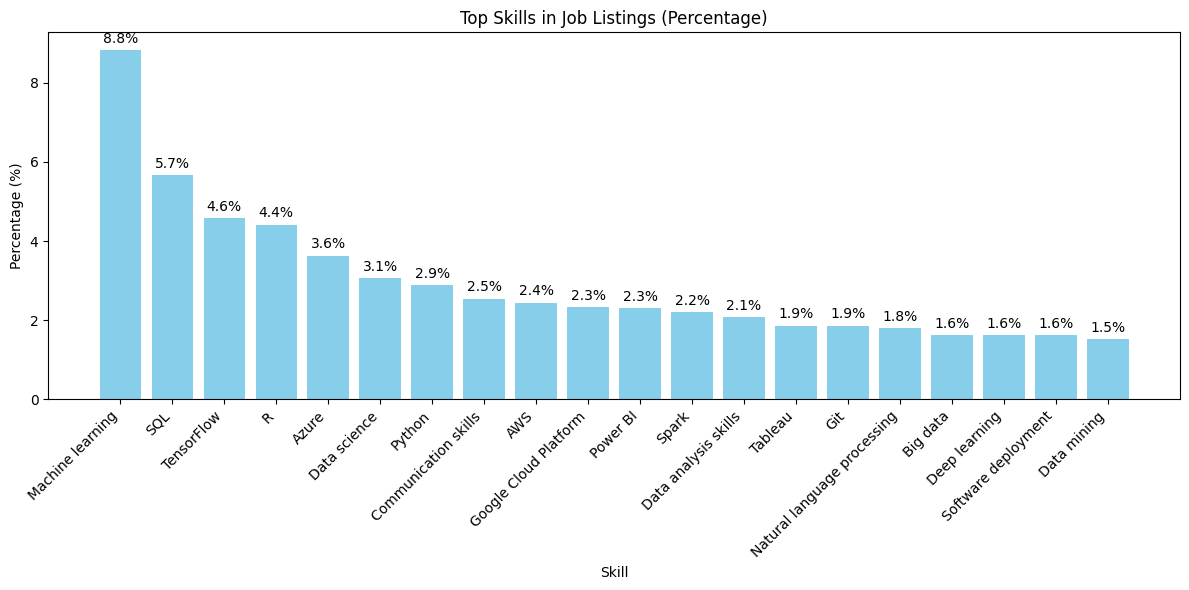

In [13]:
from collections import Counter

# As df['skills'] exists and is comma-separated

all_skills = df['Skills'].str.split(',').explode().str.strip()

skill_counts = Counter(all_skills)
total_skills = sum(skill_counts.values())

# Convert counts to percentages
skill_percentages = {skill: (count / total_skills) * 100 for skill, count in skill_counts.items()}

# Convert to DataFrame for plotting
skill_df = pd.DataFrame(skill_percentages.items(), columns=['Skill', 'Percentage'])
skill_df = skill_df.sort_values(by='Percentage', ascending=False).head(20)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(skill_df['Skill'], skill_df['Percentage'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top Skills in Job Listings (Percentage)')
plt.xlabel('Skill')
plt.ylabel('Percentage (%)')
plt.tight_layout()

# Optionally, add percentage labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()




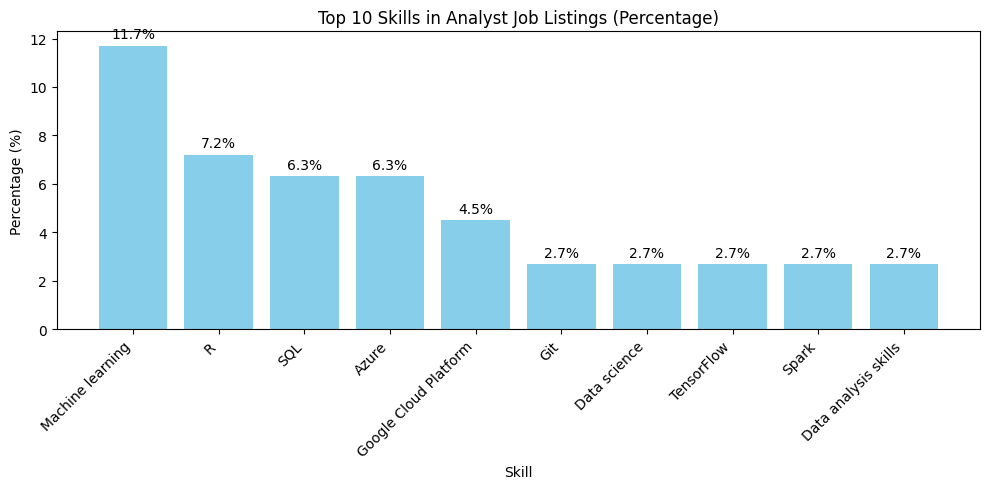

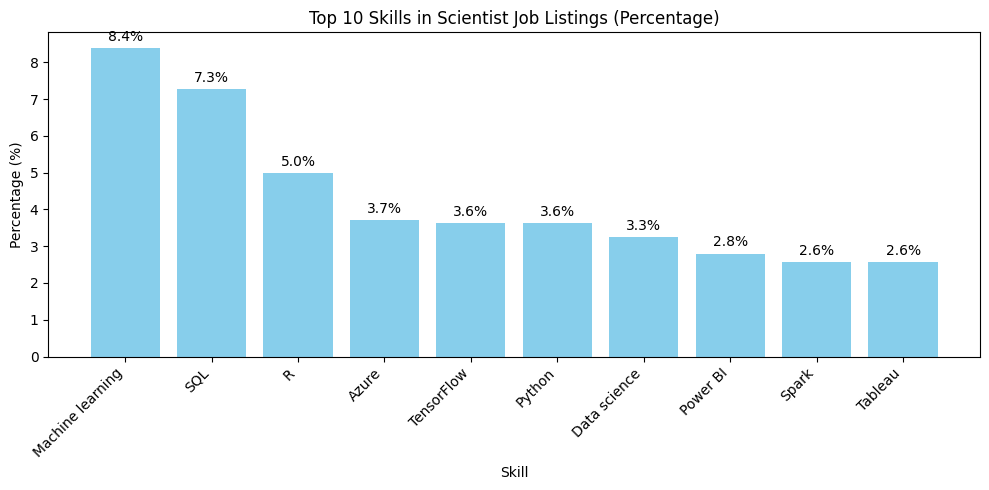

In [14]:
#function to look through skills section
def plot_top_skills_percentage(df, skills_col='Skills', top_n=10, title_suffix=''):
    all_skills = df[skills_col].str.split(',').explode().str.strip()
    skill_counts = Counter(all_skills)
    total_skills = sum(skill_counts.values())
    skill_percentages = {skill: (count / total_skills) * 100 for skill, count in skill_counts.items()}
    skill_df = pd.DataFrame(skill_percentages.items(), columns=['Skill', 'Percentage'])
    skill_df = skill_df.sort_values(by='Percentage', ascending=False).head(top_n)

    #Bar graph details
    plt.figure(figsize=(10, 5))
    bars = plt.bar(skill_df['Skill'], skill_df['Percentage'], color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Top {top_n} Skills in {title_suffix} Job Listings (Percentage)')
    plt.xlabel('Skill')
    plt.ylabel('Percentage (%)')
    plt.tight_layout()

    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

    plt.show()

# Filter data for Analyst jobs
analyst_jobs = df[df['Job Title'].str.contains('analyst', case=False, na=False)]

# Filter data for Scientist jobs
scientist_jobs = df[df['Job Title'].str.contains('scientist', case=False, na=False)]

# Plot for Analyst jobs
plot_top_skills_percentage(analyst_jobs, skills_col='Skills', top_n=10, title_suffix='Analyst')

# Plot for Scientist jobs
plot_top_skills_percentage(scientist_jobs, skills_col='Skills', top_n=10, title_suffix='Scientist')



In [15]:
# Find the most common job titles
df['Job Title'].value_counts().head(10)

,count
Job Title,
Data Scientist,67
Senior Data Scientist,36
Machine Learning Engineer,18
Lead Data Scientist,10
Senior Machine Learning Engineer,5
Director of Data Science,5
Principal Data Scientist,5
Data Analyst,4
DATA SCIENTIST,3


<ipython-input-22-4037308687>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='Job Title', y='Salary', palette='pastel')


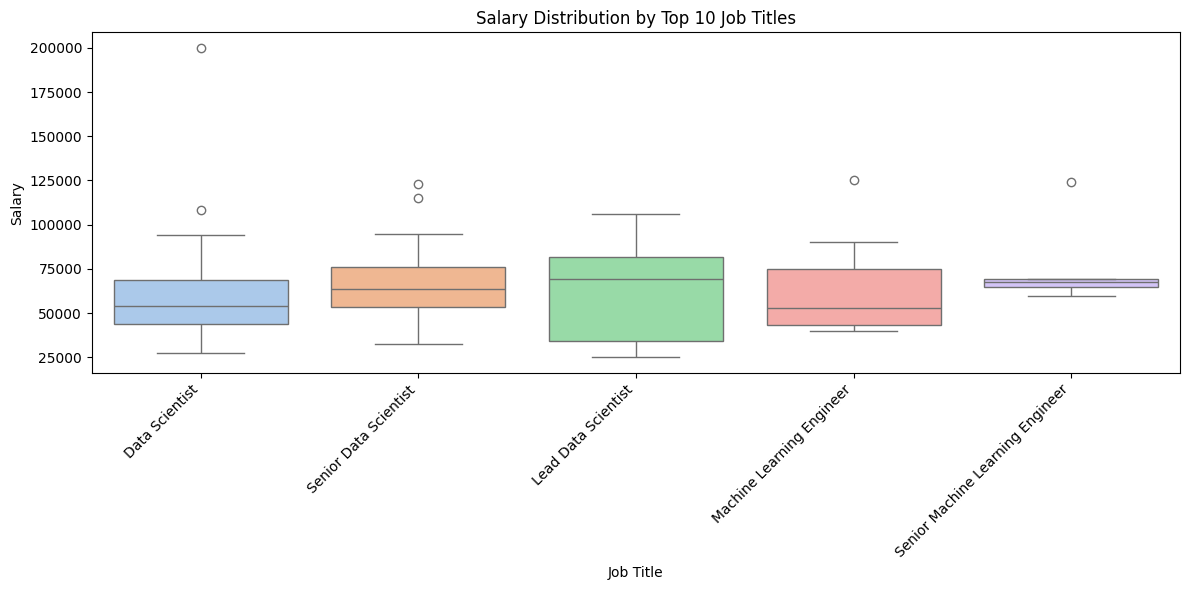

In [22]:
top_titles = df['Job Title'].value_counts().head(5).index.tolist()
filtered_df = df[df['Job Title'].isin(top_titles)]

# Step 3: Clean salary column
filtered_df = df[df['Job Title'].isin(top_titles)].copy()
filtered_df['Salary'] = pd.to_numeric(filtered_df['Salary'], errors='coerce')

# Step 4: Plot box plot using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Job Title', y='Salary', palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.title('Salary Distribution by Top 10 Job Titles')
plt.ylabel('Salary')
plt.xlabel('Job Title')
plt.tight_layout()
plt.show()

In [25]:
total_mentions = sum(skill_counts.values())

skill_stats = []

for skill in skill_counts:
    # Filter jobs that mention this skill
    mask = df['Skills'].apply(lambda skills: skill in skills)
    matched_jobs = df[mask]

    median_salary = matched_jobs['Salary'].median()
    demand_percent = (skill_counts[skill] / total_mentions) * 100

    skill_stats.append({
        'Skill': skill,
        'Demand (%)': round(demand_percent, 2),
        'Median Salary': round(median_salary, 2)
    })

# Step 4: Create a DataFrame with results
skill_df = pd.DataFrame(skill_stats)
skill_df = skill_df.sort_values(by=['Demand (%)','Median Salary'], ascending=False).reset_index(drop=True)

# Display top 20 optimal skills to learn
skill_df.head(20)

,Skill,Demand (%),Median Salary
0,Machine learning,8.83,63000.0
1,SQL,5.67,58500.0
2,TensorFlow,4.58,65000.0
3,R,4.41,63500.0
4,Azure,3.63,67000.0
5,Data science,3.05,64000.0
6,Python,2.89,61500.0
7,Communication skills,2.55,58000.0
8,AWS,2.44,67250.0
9,Google Cloud Platform,2.34,67500.0


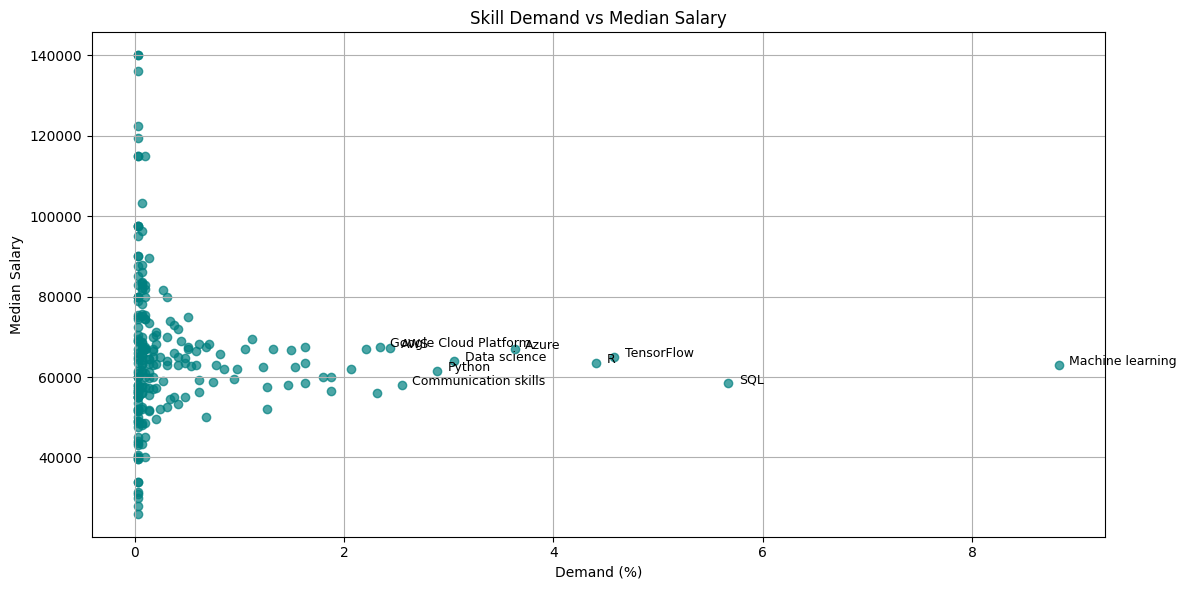

In [27]:
plt.figure(figsize=(12, 6))
plt.scatter(skill_df['Demand (%)'], skill_df['Median Salary'], alpha=0.7, color='teal')

for i, row in skill_df.head(10).iterrows():  # label top 10 points
    plt.text(row['Demand (%)']+0.1, row['Median Salary'], row['Skill'], fontsize=9)

plt.xlabel('Demand (%)')
plt.ylabel('Median Salary')
plt.title('Skill Demand vs Median Salary')
plt.grid(True)
plt.tight_layout()
plt.show()

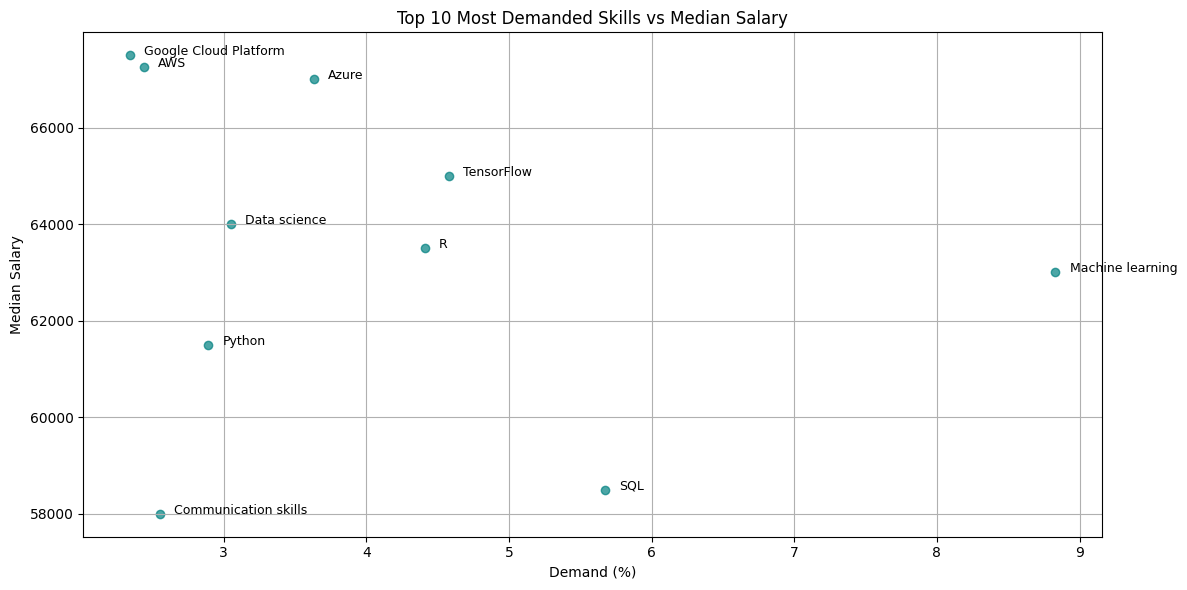

In [30]:
# Plot only the top 10 skills by demand
plt.figure(figsize=(12, 6))

plt.scatter(skill_df.head(10)['Demand (%)'], skill_df.head(10)['Median Salary'], alpha=0.7, color='teal')

# Label the top 10 points
for i, row in skill_df.head(10).iterrows():
    plt.text(row['Demand (%)'] + 0.1, row['Median Salary'], row['Skill'], fontsize=9)

plt.xlabel('Demand (%)')
plt.ylabel('Median Salary')
plt.title('Top 10 Most Demanded Skills vs Median Salary')
plt.grid(True)
plt.tight_layout()
plt.show()